This project examines health data in the form of EDA and machine learning. 

I cannot use data from my work so I found a dataset on Kaggle. I think it shows most characteristics of what we have learned in the course but probably could have been a bit better with spending more time (if I had it).

Thanks for teaching this class. I thought it was interesting and I learned a lot. I will keep in touch when I have questions about anything will continue looking for interesting datasets (when I have more time). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv("heart.csv")

In [44]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Explanation of data source
Data source is from Kaggle.com at the following URL for [Heart Data](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

The data is for 912 patients in four different countries and assesses the risk of a heart attack with basic health information. This project will use ML and EDA to try and determine the most important risk factors for heart disease and a potential heart attack.





# Data Reference:

Fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved March 6, 20202 from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

# Explanation of rows/columns

Rows:

Each row is for a person that was used to measure their health and heart condition

Columns:

- Age: age of patient
- Sex: Male or Female
- ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal - - Pain, ASY: Asymptomatic)
- RestingBP: resting blood pressure (mm Hg)
- Cholesterol: serum cholesterol (mm/dl)
- FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)
- RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave  abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)
- ExerciseAngina: exercise-induced angina (Y: Yes, N: No)
- Oldpeak: oldpeak = ST Numeric value measured in depression
- ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)
- HeartDisease: output class (1: heart disease, 0: Normal)


# Findings
1) The ML model that fit the data best is the logical regression model. This makes sense for classifying a yes/no data column. In this project it was for if someone has heart disease or not.

2) Cholesterol is not by itself a statistically significant indication of (see chart) heart disease. However, the type of chest pain does have dependence on cholesterol. 

3) A column that is missing from this data is the weight of the patient. Understanding BMI along with the other information would add value to the dataset and the findings.

# Insight

These results could very easily be used to assess insurance costs for certain individuals to determine their risk factors. You could also use the data to convince people to get healthier if they are showing signs of a predispotion to heart disease. In reality, insurance companies and doctors are already doing this probably with much larger datasets. I would use information like this to give to actuaries that determine health costs. Hospitals and doctors to help treat patients. Maybe determine when the best time is to start issuing cholesterol medication. 


# Initial data cleaning and data exporation
The data is already pretty well cleaned so for this project I just used some what we learned through the class to look at the data and had to remove some rows that were zeroes (not nan)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.isna().any() #Check if there is any missing data 

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [7]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.groupby('Sex')['RestingBP'].mean()

Sex
F    132.212435
M    132.445517
Name: RestingBP, dtype: float64

In [12]:
nummale = data[data['Sex']=='M']['Sex'].count()
numfemale = len(data)-nummale
print('male:', nummale)
print('female:', numfemale)

# Far more men than women

male: 725
female: 193


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

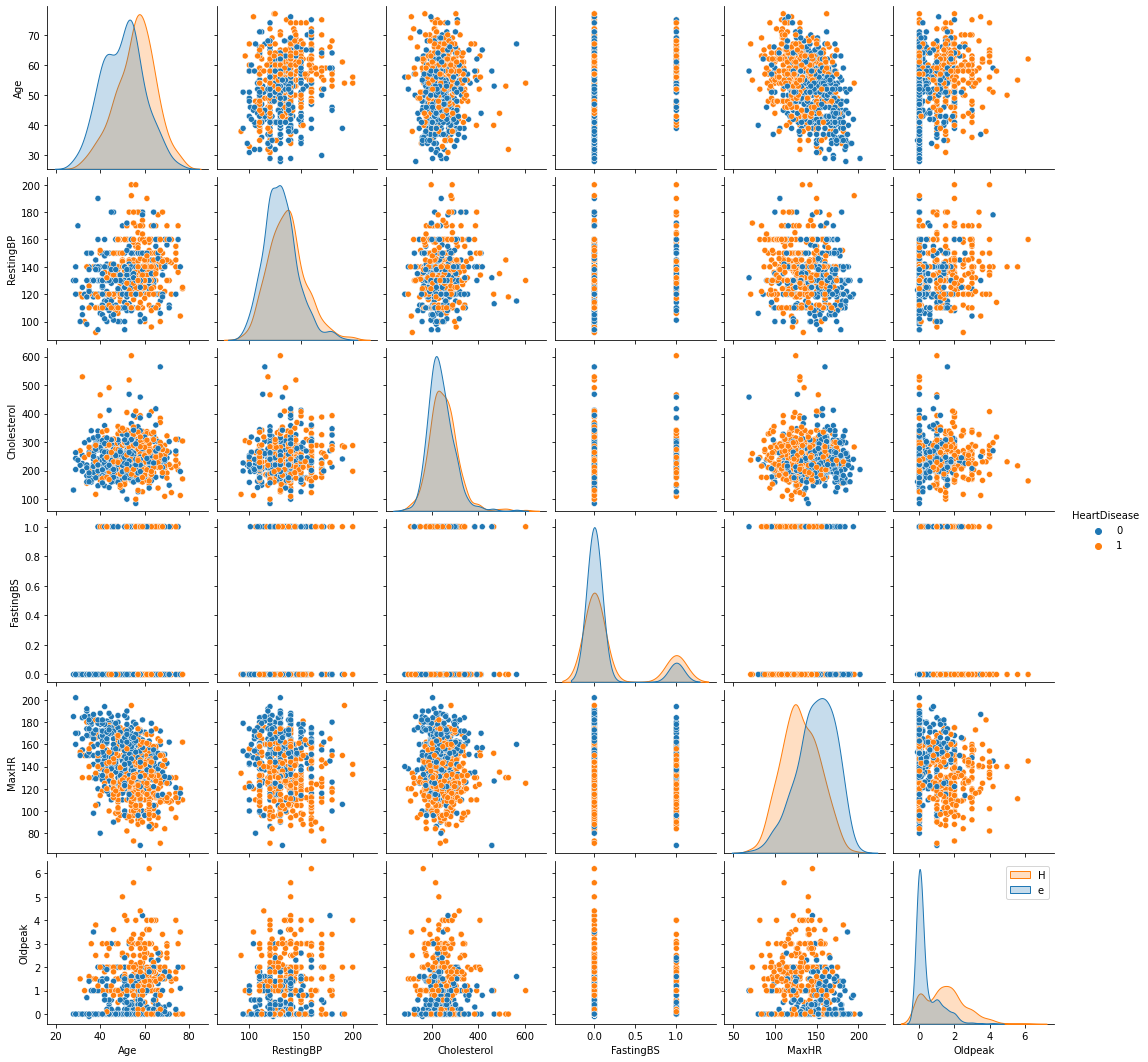

In [73]:
sns.pairplot(data,hue='HeartDisease')
plt.legend("HeartDisease")

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

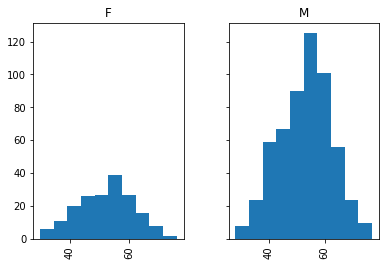

In [96]:
data.hist(column='Age', by='Sex', sharey=True)
# Note different y-axis values

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

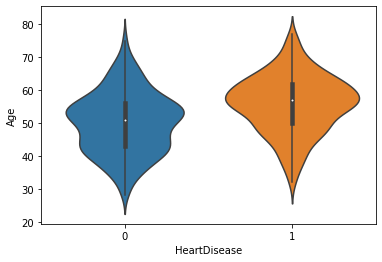

In [92]:
sns.violinplot(x=data['HeartDisease'],y=data['Age'])
# Higher number of older people that have heart disease

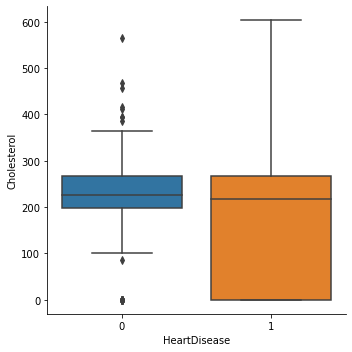

In [18]:
sns.catplot(x='HeartDisease',y='Cholesterol',data=data, kind='box')

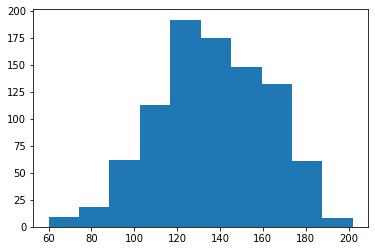

In [26]:
plt.hist(data = data, x = "MaxHR");
#MaxHR vs. counts

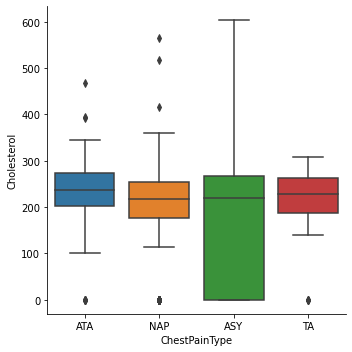

In [31]:
sns.catplot(x='ChestPainType', y='Cholesterol',data=data, kind='box')

In [45]:
#remove cholesterol rows that are equal to 0
data= data[data.Cholesterol != 0]


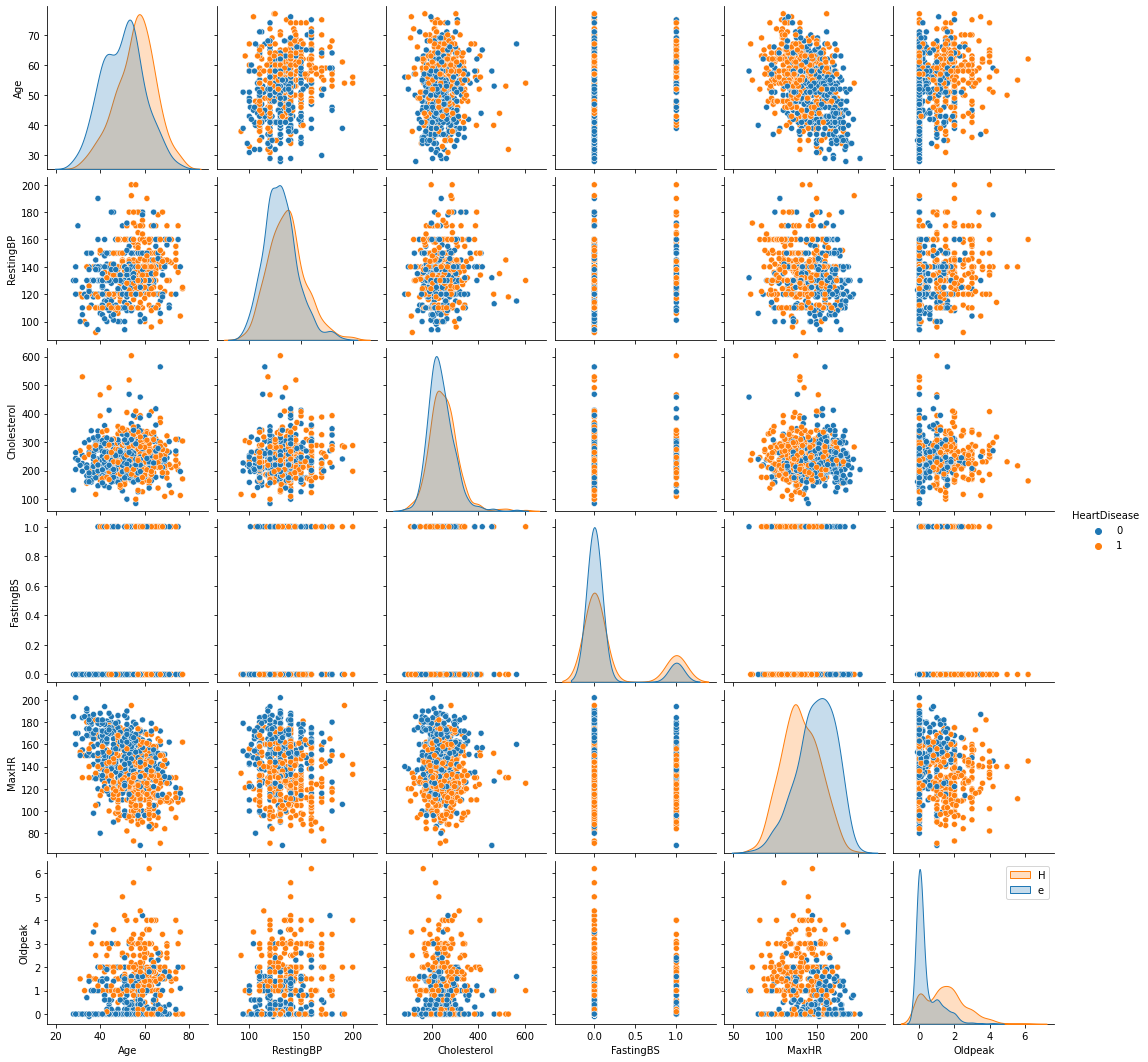

In [74]:
sns.pairplot(data,hue='HeartDisease')
plt.legend("HeartDisease")

In [34]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


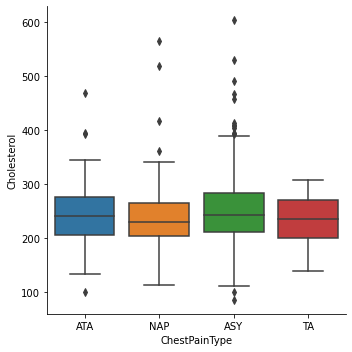

In [33]:
sns.catplot(x='ChestPainType', y='Cholesterol',data=data, kind='box')

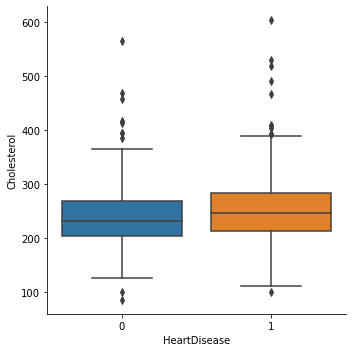

In [123]:
sns.catplot(x='HeartDisease',y='Cholesterol',data=data, kind='box')

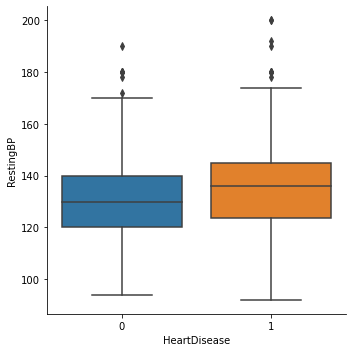

In [121]:
sns.catplot(x='HeartDisease',y='RestingBP',data=data, kind='box')

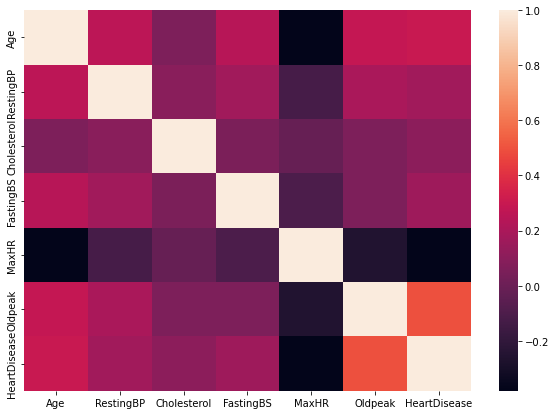

In [126]:
fig = plt.figure(figsize=(10, 7))
sns.heatmap(data.corr())
plt.show()

# ML SVM

In [27]:
from sklearn.svm import SVC

In [46]:
data_svm = pd.get_dummies(data)
data_svm.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [47]:
X = data_svm.drop('HeartDisease', axis=1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [48]:
y = data_svm['HeartDisease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [98]:
model = SVC()

In [99]:
model.fit(X_train, y_train)

SVC()

In [100]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.60      0.64       131
           1       0.53      0.63      0.58        93

    accuracy                           0.61       224
   macro avg       0.61      0.61      0.61       224
weighted avg       0.63      0.61      0.61       224



In [101]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [102]:
data_svm2 = data.drop(['MaxHR','Oldpeak'], axis=1)
data_svm2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,N,Up,0
1,49,F,NAP,160,180,0,Normal,N,Flat,1
2,37,M,ATA,130,283,0,ST,N,Up,0
3,48,F,ASY,138,214,0,Normal,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,N,Up,0


In [105]:
data_svm3 = pd.get_dummies(data_svm2)
data_svm3.head()
X = data_svm3

In [107]:
X = data_svm3.drop('HeartDisease', axis=1)
y = data_svm3['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC()
model.fit(X_train, y_train)
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62        71
           1       0.63      0.33      0.43        79

    accuracy                           0.55       150
   macro avg       0.57      0.56      0.53       150
weighted avg       0.58      0.55      0.52       150



# Linear Regression



In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [108]:
model.fit(X_train, y_train)

SVC()

In [109]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [110]:
from sklearn import metrics

In [111]:
# compute the root of mean squared error of our predictions
print("root of mean squared error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# compute the mean absolute error error of our predictions
print("mean absolute error: ", metrics.mean_squared_error(y_test, y_pred))



root of mean squared error:  0.6733003292241385
mean absolute error:  0.4533333333333333


# Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression

In [113]:
model = LogisticRegression(solver='liblinear')

In [114]:
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [115]:
y_test_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        71
           1       0.85      0.90      0.87        79

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



# KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

In [118]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_test_predict = model.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_predict)

0.58